<a href="https://colab.research.google.com/github/usaidahmed01/Deep-Learning/blob/master/9Dec25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ------------------------------------------------------------------- 9-DEC-2025

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.datasets import imdb

In [2]:
(train_data , train_labels) , (test_data , test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
def vectorizesequences(sequences , dimension = 10000):
  results = np.zeros((len(sequences) , dimension))
  for i , sequence in enumerate(sequences):
    for j in sequence:
      if j < dimension:
        results[i , j] = 1
  return results


In [4]:
X_train = vectorizesequences(train_data)
X_test = vectorizesequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [6]:
model = keras.Sequential([
    layers.Dense(16 , activation = 'relu'),
    layers.Dense(16 , activation = 'relu'),
    layers.Dense(1 , activation = 'sigmoid')
])

model.compile(
    optimizer = 'rmsprop',
    loss = 'binary_crossentropy', # cuz our output is in binary
    metrics = ['accuracy']
)

In [7]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val , y_val), # Self testing
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.6667 - loss: 0.6204 - val_accuracy: 0.8547 - val_loss: 0.4399
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.8888 - loss: 0.3830 - val_accuracy: 0.8813 - val_loss: 0.3317
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9132 - loss: 0.2752 - val_accuracy: 0.8817 - val_loss: 0.3039
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9309 - loss: 0.2163 - val_accuracy: 0.8777 - val_loss: 0.3022
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9429 - loss: 0.1774 - val_accuracy: 0.8738 - val_loss: 0.3100
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9540 - loss: 0.1475 - val_accuracy: 0.8881 - val_loss: 0.2793
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9608 - loss: 0.1299 - val_accuracy: 0.8874 - val_loss: 0.2900
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9673 - loss: 0.1080 - val_accuracy: 0.8843 - 

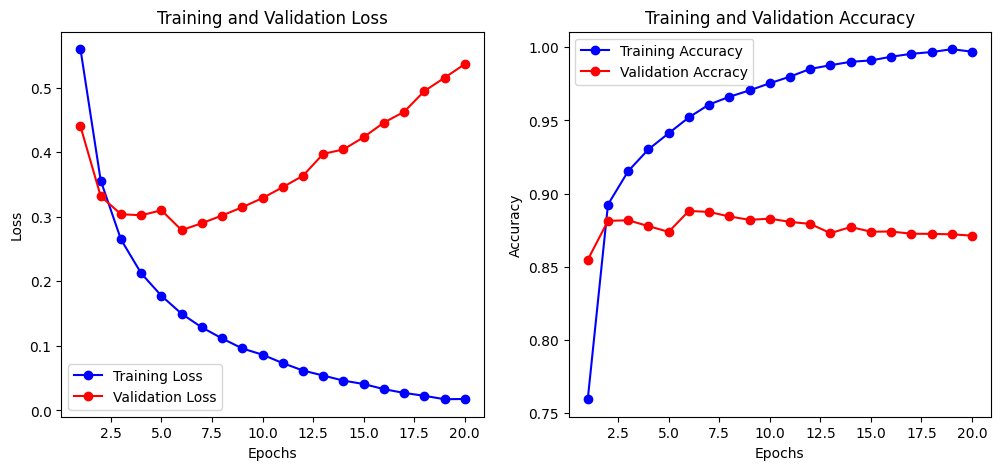

In [10]:
history_dict = history.history
epochs = range(1 , len(history_dict['loss']) + 1)

plt.figure(figsize = (12 , 5))

# Loss
plt.subplot(1 , 2 , 1)
plt.plot(epochs , history_dict['loss'] , 'b-o' , label = 'Training Loss')
plt.plot(epochs , history_dict['val_loss'] , 'r-o' , label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1 , 2 , 2)
plt.plot(epochs , history_dict['accuracy'] , 'b-o' , label = 'Training Accuracy')
plt.plot(epochs , history_dict['val_accuracy'] , 'r-o' , label = 'Validation Accracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Validation loss if suddenly increasing it means model is going towards the overfitting


In [11]:
results = model.evaluate(X_test , y_test)
print("Loss: " , results[0])
print("Accuracy: " , results[1])

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8573 - loss: 0.5943
Loss:  0.579505205154419
Accuracy:  0.8605599999427795


In [17]:
# Real Review
word_index = imdb.get_word_index() # Vocabulary

new_review = "The Movie was Boring and Pathetic"

def reviewToSequence(review , word_index , num_words = 10000):
  sequence = []
  for word in review.split():
    index = word_index.get(word , 2) # 2 because it is used for unknown
    if index < num_words:
      sequence.append(index)
  return sequence

sequence = reviewToSequence(new_review , word_index)
x_new = vectorizesequences([sequence])

In [14]:
print(x_new) # jahan jahan words wahan 1 otherwise 0

[[0. 0. 1. ... 0. 0. 0.]]


In [18]:
prediction = model.predict(x_new)[0][0]
print("Prediction Probabilty: " , prediction)
print("Sentiment: " , 'Positive' if prediction > 0.5 else 'Negative')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction Probabilty:  0.61432344
Sentiment:  Positive


In [ ]:
# Reuters newswires